In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
sns.set_theme(style="darkgrid")
# import eaShiputils
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='DejaVu Sans', font_scale=0.8)
pd.set_option('mode.chained_assignment', None)

In [2]:
def d2f(degree=0, minute=0, second=0):
    """
        坐标经纬度角度转浮点数
        Example In: 29, 44.765 -> (29°44.765'N )
        Example Return: 29.746083
    """
    result = 0
    if degree:
        result = degree
    if minute:
        result += minute / 60
    if second:
        result += second / 3600
    return round(result, 6)

In [3]:
# 渤海航道面积
from geopy import distance
lat1 = d2f(37, 11.572)
lon1 = d2f(122, 45.880)
lat2 = d2f(37, 11.572)
lon2 = d2f(122, 53.584)
lat3 = d2f(37, 24.501)
lon3 = d2f(122, 45.880)
lat4 = d2f(37, 24.501)
lon4 = d2f(122, 53.584)
midlon = d2f(122, 49.700)
long = distance.distance((lat1, lon1), (lat2, lon2)).km
width = distance.distance((lat2, lon2), (lat4, lon4)).km
seaArea = long * width
# 单位 平方千米
seaArea
# 最低平均速度8节左右
timeSeg = long / (8 * 1.852)
timeSeg

0.7694496539796953

In [4]:
# 苏伊士运河
slat1 = d2f(33, 40)
slon1 = d2f(23, 20)
slat2 = d2f(34, 43)
slon2 = d2f(23, 55)
slat3 = d2f(32, 0)
slon3 = d2f(33, 0)
slat4 = d2f(31, 0)
slon4 = d2f(32, 0)

In [24]:
data = pd.read_csv("data.csv",encoding='utf-8')
# 过滤数据
data = data[(data['speed'] > 0) & (data['speed'] < 20) & ((data['hdg'] < 0) | (data['hdg'] > 180))]
data.reset_index(drop=True, inplace=True)

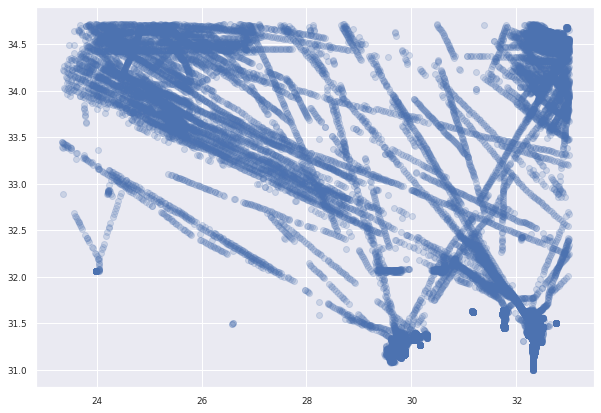

In [29]:
x = data.lon
y = data.lat
plt.figure(figsize=(10,7))
plt.scatter(x, y, alpha=0.2)
plt.show()

In [18]:
"""
    KQV
"""
# 船舶数量
shipNums = len(data['mmsi'].unique())
# 航道宽度
width = distance.distance((slat2, slon2), (slat4, slon4)).km
long = distance.distance((slat1, slon1), (slat2, slon2)).km
times = [datetime.datetime.strptime(i[:19], "%Y-%m-%d %H:%M:%S") for i in data.postime]
times = sorted(times)
# 以天为时间划分 每天一取
splitDay = range(1, 32, 1)
splitHour = range(1, 24, 1)
Q = []
K = []
V = []
for j in splitDay:
    # 记录逐天船舶数量 与 逐天的船舶流量
    for k in splitHour:
        shipNum = 0
        q = 0
        k = 0
        v = 0
        vs = 0
        for i,time in enumerate(times):
            if time.day == j and time.hour == k:
                shipNum += 1
                vs += data.speed[i]
        try: 
            v = vs / shipNum 
            V.append(v)
        except:
            v = 0
            V.append(v)
        q = shipNum
        Q.append(q)
        k = shipNum / long
        K.append(k)


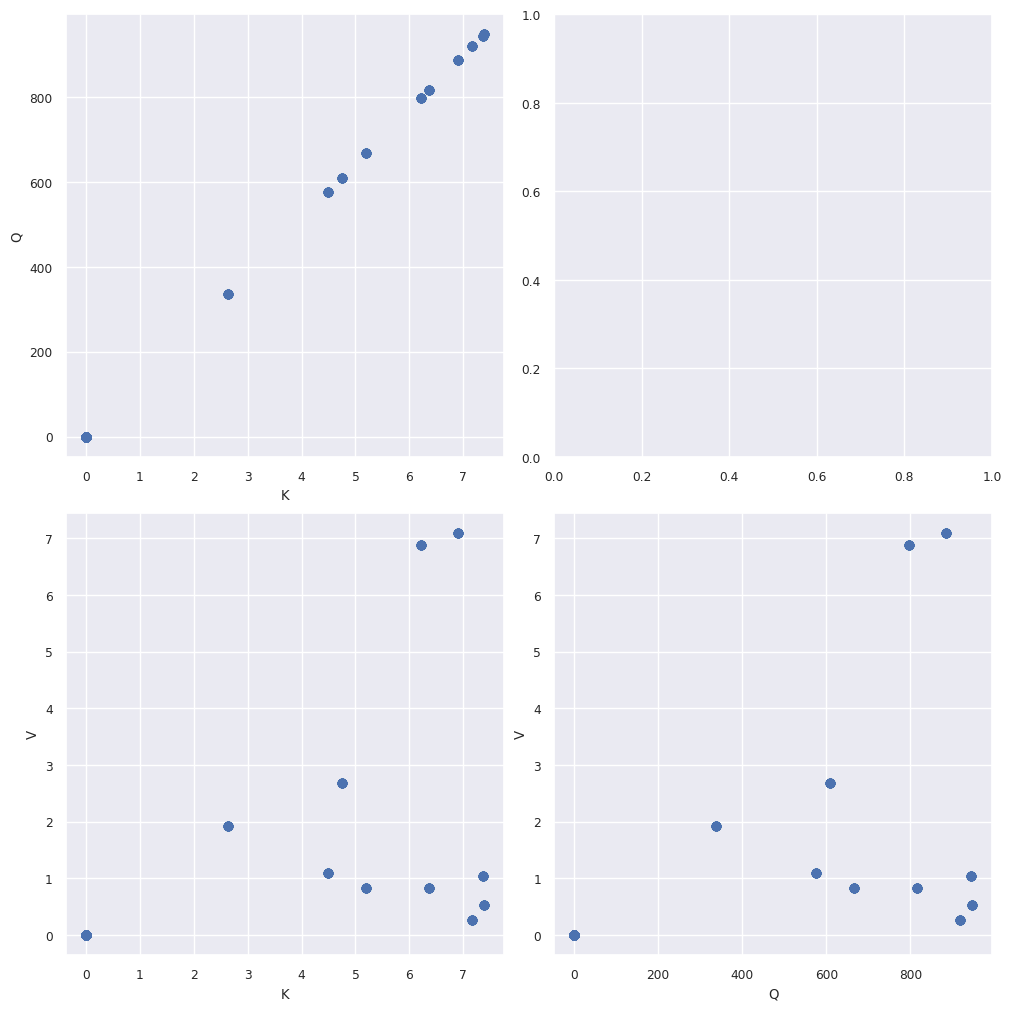

In [19]:
plt.subplots(2,2,constrained_layout=True,figsize=(10,10),dpi=100)
plt.subplot(221)
x1 = K
y1 = Q 
plt.scatter(x1, y1, alpha=0.5)
plt.xlabel("K")
plt.ylabel("Q")
x2 = K
y2 = V
plt.subplot(223)
plt.scatter(x2, y2, alpha=0.5)
plt.xlabel("K")
plt.ylabel("V")
x3 = Q
y3 = V 
plt.subplot(224)
plt.scatter(x3, y3, alpha=0.5)
plt.xlabel("Q")
plt.ylabel("V")
plt.savefig("kqv.jpg")
plt.show()

In [15]:
v = [i*1.852 for i in data.speed]
x = range(0, max(Q), 1/len(v))
len(v)
# plt.figure()
# plt.scatter(x,v)

TypeError: 'float' object cannot be interpreted as an integer